Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [19]:
from sklearn.ensemble import RandomForestRegressor

Loading Dataset

In [3]:
data=pd.read_csv('Advertising.csv')

In [4]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data=data.iloc[:,1:]

In [7]:
data.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


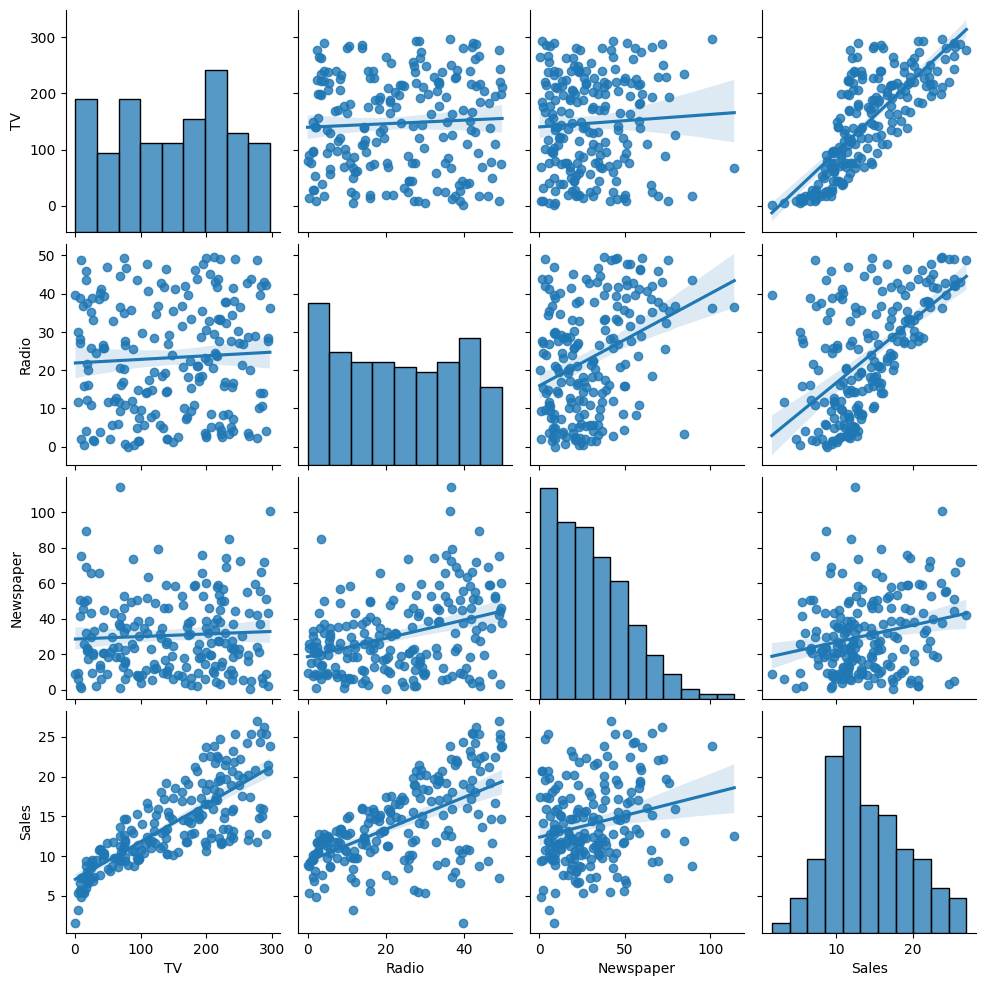

In [9]:
sns.pairplot(data,kind="reg");

<Axes: xlabel='Newspaper', ylabel='Sales'>

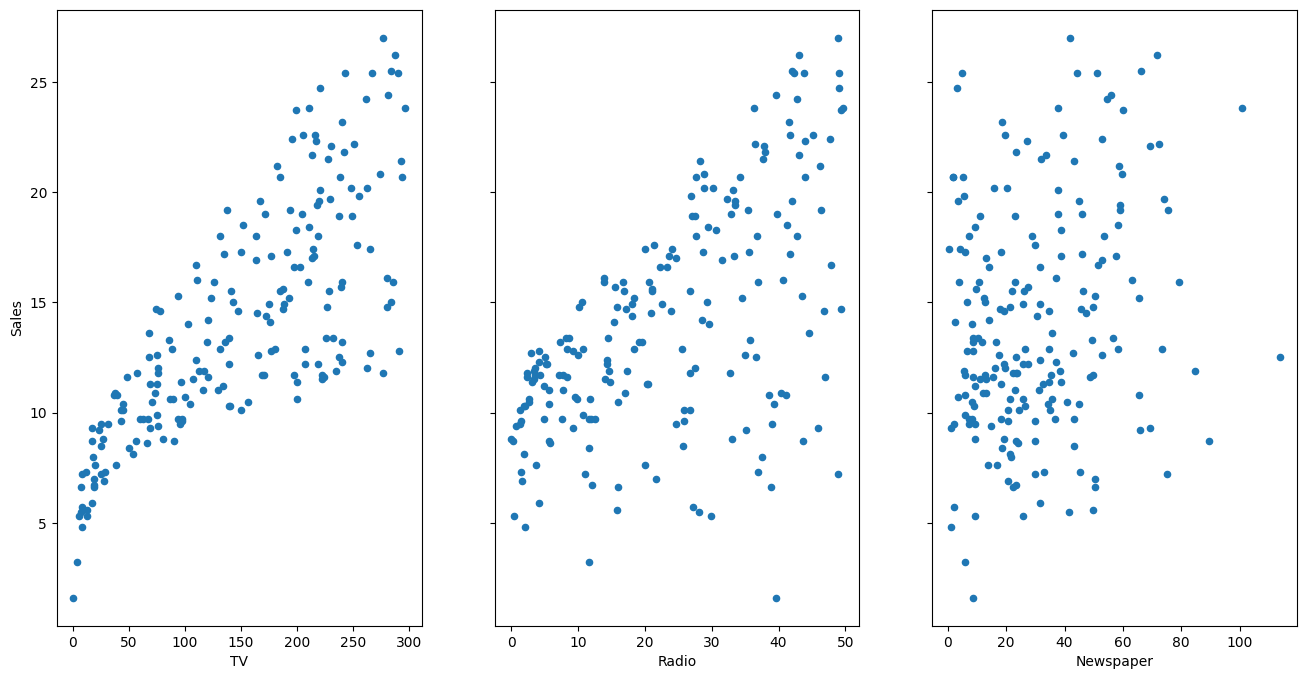

In [10]:
fig,axs= plt.subplots(1,3,sharey=True)
data.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
data.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))

In [13]:
data=data[data['Newspaper']<=90]
data.shape

(198, 4)

In [14]:
x=data.drop(columns=['Sales'])
y=data['Sales']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
column_trans=make_column_transformer((OneHotEncoder(),[]),remainder='passthrough')
scaler=StandardScaler()
oe=OrdinalEncoder()

In [20]:
r=RandomForestRegressor(n_estimators=10,random_state=0)
pipe=make_pipeline(column_trans,scaler,r)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.9841668366972347

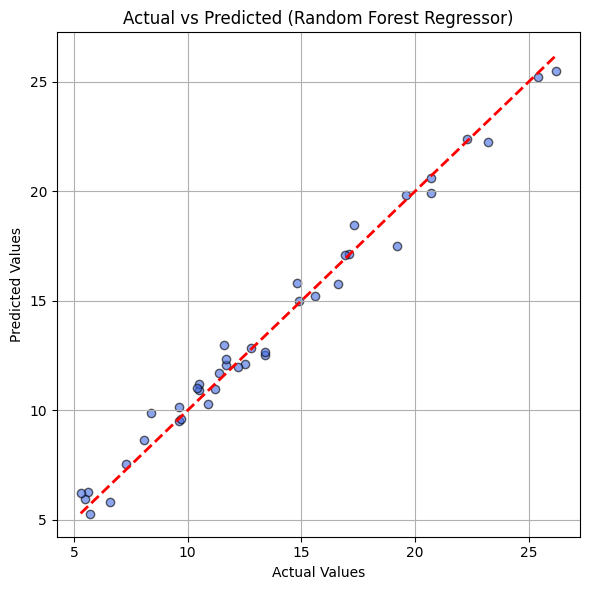

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_r, color="royalblue", alpha=0.6, edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()

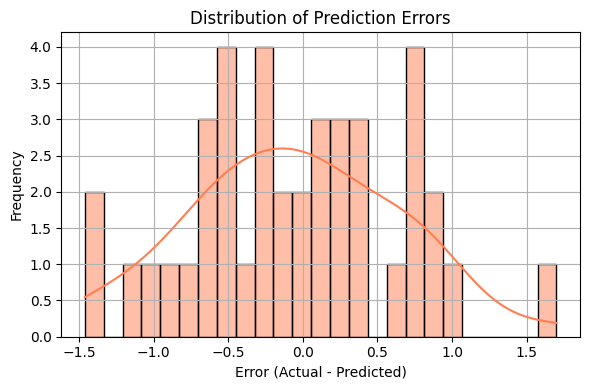

In [22]:
errors = y_test - y_pred_r
plt.figure(figsize=(6,4))
sns.histplot(errors, bins=25, kde=True, color="coral")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
pickle.dump(pipe,open('sales.pkl','wb'))

In [24]:
pipe.predict([[110,20,35]])

array([12.63])